Found 10164 files belonging to 14 classes.
Using 8132 files for training.
Found 10164 files belonging to 14 classes.
Using 2032 files for validation.
Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.5797 - loss: 1.3749 - val_accuracy: 0.8991 - val_loss: 0.3361
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 707s 3s/step - accuracy: 0.8565 - loss: 0.4477 - val_accuracy: 0.9016 - val_loss: 0.2969
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - accuracy: 0.8983 - loss: 0.3328 - val_accuracy: 0.9158 - val_loss: 0.2679
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - accuracy: 0.9130 - loss: 0.2622 - val_accuracy: 0.9237 - val_loss: 0.2481
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 691s 3s/step - accuracy: 0.9219 - loss: 0.2362 - val_accuracy: 0.9247 - val_loss: 0.2537
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 664s 3s/step - accuracy: 0.9386 - loss: 0.1883 - val_accuracy: 0.9311 - val_loss: 0.2443
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 691s 3s/step - accuracy: 0.9420 - lo

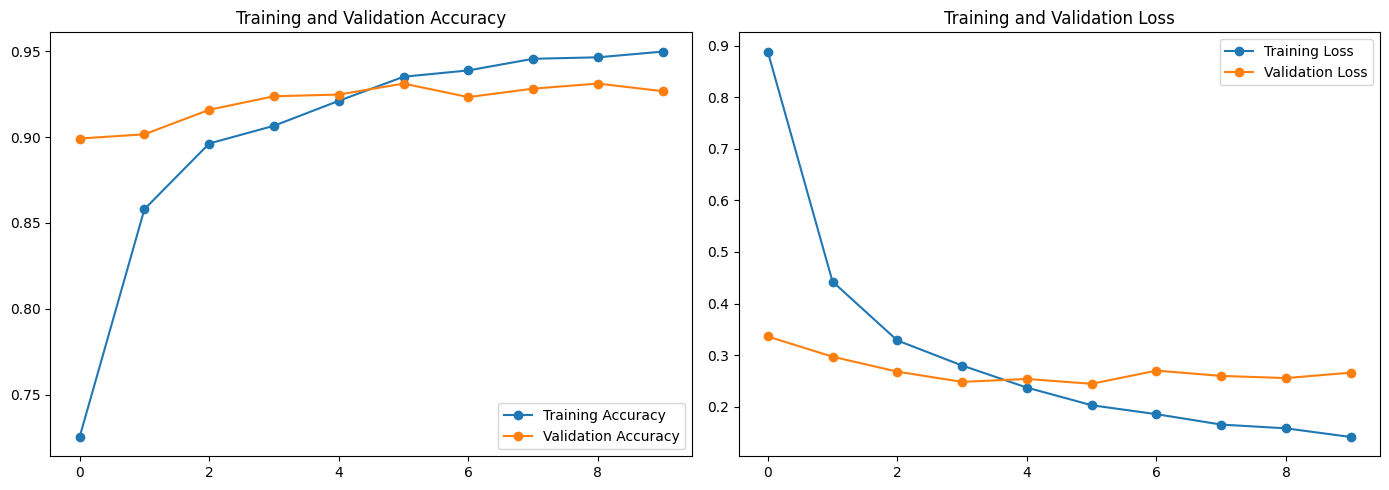

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os

# 1. Set parameters and load dataset
data_dir = "flowers14Dataset/train"
img_size = (224, 224)
batch_size = 32

# Load datasets
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get number of classes
class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Preprocessing and performance optimizations
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y)).cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y)).cache().prefetch(tf.data.AUTOTUNE)

# 3. Load ResNet50 base model (without top)
base_model = ResNet50(include_top=False, input_shape=img_size + (3,), weights='imagenet')
base_model.trainable = False  # Freeze base

# 4. Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# 5. Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can increase epochs if needed
)

# 7. Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [2]:
model.save("resnet50_flower_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


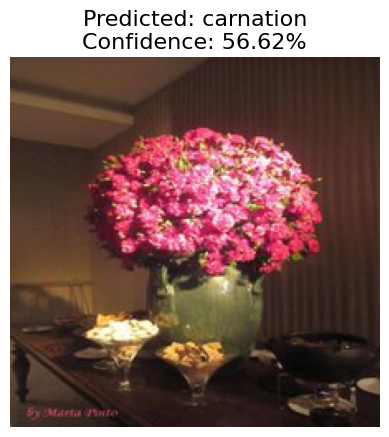

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model("resnet50_flower_classifier.h5")  # Adjust path if needed

# Define class names (update with your actual class names)
class_names = ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy',
               'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0), img

# Assign the path of your image
image_path = "d.jpg"  # Change this path to the image you want to predict

# Preprocess the uploaded image
processed_img, display_img = preprocess_image(image_path)

# Make the prediction
pred = model.predict(processed_img)
predicted_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100  # Convert to percentage

# Display the image and prediction
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=16)
plt.show()
